# Import Data

In [1]:
import pandas as pd

train_path = '/kaggle/input/hateexplaindataset/train.parquet'
val_path = '/kaggle/input/hateexplaindataset/validation.parquet'
test_path = '/kaggle/input/hateexplaindataset/test.parquet'

df_train = pd.read_parquet(train_path)
df_valid = pd.read_parquet(val_path)
df_test = pd.read_parquet(test_path)


display(df_train.head())
display(df_valid.head())
display(df_test.head())



,id,label,rationales,post_tokens
0,23107796_gab,2,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, ...","[u, really, think, i, would, not, have, been, ..."
1,9995600_gab,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[the, uk, has, threatened, to, return, radioac..."
2,1227920812235051008_twitter,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]","[if, english, is, not, imposition, then, hindi..."
3,1204931715778543624_twitter,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[no, liberal, congratulated, hindu, refugees, ..."
4,1179102559241244672_twitter,2,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[he, said, bro, even, your, texts, sound, redn..."


,id,label,rationales,post_tokens
0,1178610029273976833_twitter,1,[],"[<user>, men, can, not, be, raped, can, not, b..."
1,1165785686903009283_twitter,1,[],"[<user>, you, are, missing, an, essential, pre..."
2,1252707503441313794_twitter,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]","[<user>, <user>, why, are, you, repeating, you..."
3,1103385226921762816_twitter,0,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[<user>, <user>, well, she, ’, muslim, so, of,..."
4,1169443635869487105_twitter,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[<user>, lol, not, me, i, don, ’, t, deal, wit..."


,id,label,rationales,post_tokens
0,1178613994371928065_twitter,1,[],"[me, getting, books, from, the, library, about..."
1,1170285336221638656_twitter,1,[],"[y, si, fuera, top, <number>, me, faltarían, h..."
2,1179099934731190272_twitter,1,[],"[<user>, <user>, <user>, i, am, a, lesbian, no..."
3,1178856372617846789_twitter,1,[],"[<user>, by, tweeting, about, a, civil, war, t..."
4,1178878849570021376_twitter,1,[],"[<user>, <user>, you, all, only, caring, about..."


# Filter only 'Normal' and 'Hate' labeled data

In [2]:
df_train = df_train[df_train.label < 2]
df_valid = df_valid[df_valid.label < 2]
display(df_train.head())
display(df_valid.head())


,id,label,rationales,post_tokens
5,18790322_gab,1,[],"[i, live, and, work, with, many, legal, mexica..."
6,13459307_gab,0,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...","[in, britain, the, prime, minister, a, childle..."
7,1113705567782969344_twitter,1,[],"[<user>, <user>, there, shd, be, a, film, call..."
8,24555628_gab,1,[],"[jews, defends, jews, regardless, muslims, def..."
9,16382456_gab,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[the, non, partisan, congressional, budget, of..."


,id,label,rationales,post_tokens
0,1178610029273976833_twitter,1,[],"[<user>, men, can, not, be, raped, can, not, b..."
1,1165785686903009283_twitter,1,[],"[<user>, you, are, missing, an, essential, pre..."
3,1103385226921762816_twitter,0,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[<user>, <user>, well, she, ’, muslim, so, of,..."
5,17372469_gab,0,"[0, 0, 1, 1, 0, 0, 0, 0]","[an, these, nigger, biches, look, like, godzil..."
8,24305062_gab,0,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[education, or, marxist, indoctrination, since..."


# Summary of the Dataset.
**Checking for null values.**

In [3]:
import pandas as pd

def stats_table(df, name):
    nulls = df.isnull().sum()
    empties = {
        col: df[col].apply(lambda x: (isinstance(x, (list, str)) and len(x) == 0)).sum()
        for col in df.columns if df[col].dtype == object
    }
    label_counts = df['label'].value_counts().to_dict()

    return pd.DataFrame({
        "split": [name],
        "n_samples": [len(df)],
        "null_id": [nulls.get("id", 0)],
        "null_label": [nulls.get("label", 0)],
        "null_rationales": [nulls.get("rationales", 0)],
        "null_post_tokens": [nulls.get("post_tokens", 0)],
        "empty_rationales": [empties.get("rationales", 0)],
        "empty_post_tokens": [empties.get("post_tokens", 0)],
        "label_0_count": [label_counts.get(0, 0)],
        "label_1_count": [label_counts.get(1, 0)],
    })

summary_df = pd.concat([
    stats_table(df_train, "train"),
    stats_table(df_valid, "valid")
], ignore_index=True)

display(summary_df)


,split,n_samples,null_id,null_label,null_rationales,null_post_tokens,empty_rationales,empty_post_tokens,label_0_count,label_1_count
0,train,10999,0,0,0,0,0,0,4748,6251
1,valid,1376,0,0,0,0,0,0,594,782


For this code to work properly, we need 'datasets==2.16.0'

In [4]:
!pip install datasets==2.16.0

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.5.1
    Uninstalling fsspec-2025.5.1:
      Successfully uninstalled fsspec-2025.5.1
  Attempting uninstall: dill
    Found existing installation: dill 0.3.8
    Uninstalling dill-0.3.8:
      Successfully uninstalled dill-0.3.8
  Attempting uninstall: multiprocess
    Found existing installation: multiprocess 0.70.16
    Uninstalling multiprocess-0.70.16:
      Successfully uninstalled multiprocess-0.70.16
  Attempting uninstall: datasets
 

Concatenate tokens

In [5]:
from datasets import Dataset

# Assume df_train has columns: "post_tokens" (list[str]), "label"
# Join tokens into text for the tokenizer:
df_train["text"] = df_train["post_tokens"].apply(lambda toks: " ".join(toks))
df_valid["text"] = df_valid["post_tokens"].apply(lambda toks: " ".join(toks))

# Build Dataset objects
train_ds = Dataset.from_pandas(df_train[["text", "label"]])
valid_ds = Dataset.from_pandas(df_valid[["text", "label"]])

display(df_train.head())
display(df_valid.head())
print(train_ds)
print(valid_ds)


,id,label,rationales,post_tokens,text
5,18790322_gab,1,[],"[i, live, and, work, with, many, legal, mexica...",i live and work with many legal mexican immigr...
6,13459307_gab,0,"[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...","[in, britain, the, prime, minister, a, childle...",in britain the prime minister a childless woma...
7,1113705567782969344_twitter,1,[],"[<user>, <user>, there, shd, be, a, film, call...",<user> <user> there shd be a film called no hi...
8,24555628_gab,1,[],"[jews, defends, jews, regardless, muslims, def...",jews defends jews regardless muslims defend mu...
9,16382456_gab,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[the, non, partisan, congressional, budget, of...",the non partisan congressional budget office c...


,id,label,rationales,post_tokens,text
0,1178610029273976833_twitter,1,[],"[<user>, men, can, not, be, raped, can, not, b...",<user> men can not be raped can not be abused ...
1,1165785686903009283_twitter,1,[],"[<user>, you, are, missing, an, essential, pre...",<user> you are missing an essential premise wh...
3,1103385226921762816_twitter,0,"[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[<user>, <user>, well, she, ’, muslim, so, of,...",<user> <user> well she ’ muslim so of course s...
5,17372469_gab,0,"[0, 0, 1, 1, 0, 0, 0, 0]","[an, these, nigger, biches, look, like, godzil...",an these nigger biches look like godzilla nasty
8,24305062_gab,0,"[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[education, or, marxist, indoctrination, since...",education or marxist indoctrination since it i...


Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 10999
})
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 1376
})


In [11]:
from datasets import Dataset, concatenate_datasets
aug_df = pd.read_csv("/kaggle/input/augmented-misclassified-dataset/paraphrased_misclassified_samples.csv")
aug_df = (
    aug_df
    .rename(columns={"true_label": "label"})
    .loc[:, ["text", "label"]]
)
aug_ds = Dataset.from_pandas(aug_df, preserve_index=False)
train_ds = concatenate_datasets([train_ds, aug_ds])
print(aug_df.head())
print(train_ds)

                                                text  label
0  you hoes are stupid learn your self worth stop...      1
1  hey, you sluts are dumb learn your self worth ...      1
2  listen, you whores are slow learn your self wo...      1
3  i see a lot of tan people and dumb ladies bein...      0
4  hey, i see a lot of brown-skinned people and i...      0
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 12007
})


Initialize model and tokenizer

In [12]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "FacebookAI/xlm-roberta-large"
tokenizer  = AutoTokenizer.from_pretrained(model_name)
model      = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,            # your two target classes (0 vs 1)
    problem_type="single_label_classification",
)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

2025-08-03 13:06:16.595085: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754226376.840208      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754226376.913662      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Convert tokens into numbers

In [13]:
def tokenize_batch(example):
    return tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=128,    # adjust to your data
    )

train_ds = train_ds.map(tokenize_batch, batched=True)
valid_ds = valid_ds.map(tokenize_batch, batched=True)
print(train_ds)
print(valid_ds)


# Tell Trainer which columns to pass to the model
train_ds = train_ds.remove_columns(["text", "__index_level_0__"])
valid_ds = valid_ds.remove_columns(["text", "__index_level_0__"])


train_ds = train_ds.with_format("torch", columns=["input_ids", "attention_mask", "label"])
valid_ds = valid_ds.with_format("torch", columns=["input_ids", "attention_mask", "label"])

print("\n\n")
print("Prepared data for the model's input")
print(train_ds)
print(valid_ds)


Map:   0%|          | 0/12007 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 12007
})
Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 1376
})



Prepared data for the model's input
Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 12007
})
Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 1376
})


In [14]:
!pip install evaluate

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 40.6 kB/s eta 0:00:00a 0:00:01


Provide training arguments and start training

In [15]:
from transformers import TrainingArguments, Trainer, TrainerCallback
import evaluate

accuracy = evaluate.load("accuracy")

def compute_metrics(pred):
    logits, labels = pred
    preds = logits.argmax(-1)
    return accuracy.compute(predictions=preds, references=labels)


training_args = TrainingArguments(
    output_dir="./xlm-roberta-hate",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    gradient_accumulation_steps=4,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_strategy="epoch",
    eval_strategy="epoch",  # ← Fixed parameter
    save_strategy="epoch",
    save_total_limit=1,
    report_to=["none"],
    load_best_model_at_end=True,
    fp16=True,
    lr_scheduler_type="linear",
    warmup_ratio=0.1,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=valid_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/tmp/ipykernel_36/2552317389.py:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [16]:
trainer.train()


#Save the trained model
model_path = "/kaggle/working/xlm-roberta-hate-best"
trainer.save_model(model_path)


Epoch,Training Loss,Validation Loss,Accuracy
1,0.620500,0.386870,0.837936
2,0.363000,0.326564,0.869913
3,0.249000,0.318232,0.885174
4,0.162600,0.398751,0.875000
5,0.104800,0.456035,0.876453


In [17]:
print(trainer.args.logging_steps)      # How often training loss is logged
print(trainer.args.eval_strategy) # How often eval runs ("epoch", "steps", etc.)
print(trainer.args.eval_steps)          # If evaluation_strategy="steps"
history = trainer.state.log_history

print(history)

500
IntervalStrategy.EPOCH
None
[{'loss': 0.6205, 'grad_norm': 6.023730754852295, 'learning_rate': 1.7884160756501183e-05, 'epoch': 1.0, 'step': 376}, {'eval_loss': 0.3868699073791504, 'eval_accuracy': 0.8379360465116279, 'eval_runtime': 17.7931, 'eval_samples_per_second': 77.333, 'eval_steps_per_second': 4.833, 'epoch': 1.0, 'step': 376}, {'loss': 0.363, 'grad_norm': 3.577942132949829, 'learning_rate': 1.343971631205674e-05, 'epoch': 2.0, 'step': 752}, {'eval_loss': 0.3265640437602997, 'eval_accuracy': 0.8699127906976745, 'eval_runtime': 17.8133, 'eval_samples_per_second': 77.246, 'eval_steps_per_second': 4.828, 'epoch': 2.0, 'step': 752}, {'loss': 0.249, 'grad_norm': 7.467401504516602, 'learning_rate': 8.995271867612294e-06, 'epoch': 3.0, 'step': 1128}, {'eval_loss': 0.3182320296764374, 'eval_accuracy': 0.8851744186046512, 'eval_runtime': 17.8284, 'eval_samples_per_second': 77.18, 'eval_steps_per_second': 4.824, 'epoch': 3.0, 'step': 1128}, {'loss': 0.1626, 'grad_norm': 17.9631576538

# Visualize Training and Validation Accuracy and Losses. 

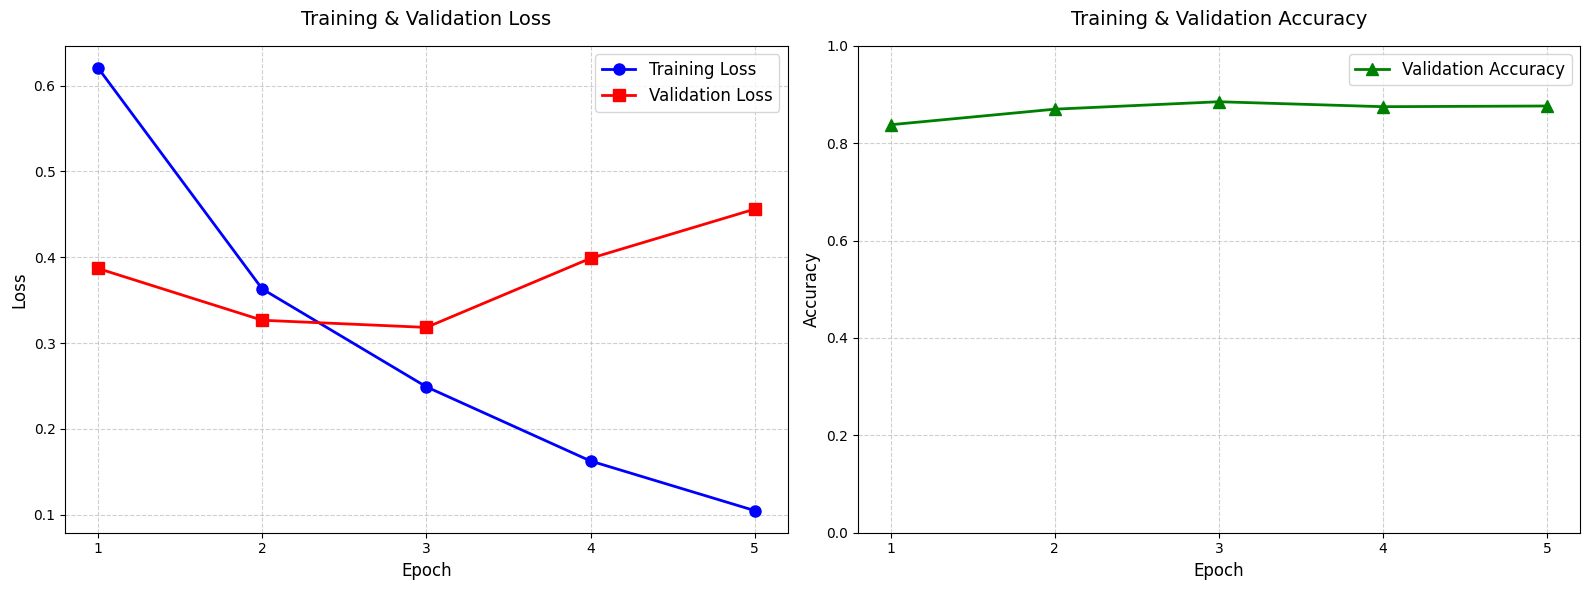

Visualization complete. Files saved in /kaggle/working/training_plots/


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Create output directory
os.makedirs("/kaggle/working/training_plots", exist_ok=True)

# Convert history to DataFrame
history = trainer.state.log_history
df = pd.DataFrame(history)

# Clean and organize the data
train_df = df[df['loss'].notna()].copy()
eval_df = df[df['eval_loss'].notna()].copy()

# Get final training metrics per epoch
final_train_loss = train_df.groupby('epoch')['loss'].last()
# Get evaluation metrics per epoch
epoch_eval = eval_df.groupby('epoch').mean()

# Calculate training accuracy (if available)
# Note: You'll need to modify this if your trainer computes training accuracy
train_accuracy = None
if 'train_accuracy' in df.columns:
    train_accuracy = df.groupby('epoch')['train_accuracy'].last()

# =====================================
# Create figure with 2 subplots for console display
# =====================================
plt.figure(figsize=(16, 6))

# 1. Loss Comparison (Subplot 1)
plt.subplot(1, 2, 1)
plt.plot(final_train_loss.index, final_train_loss, 'b-o', 
         linewidth=2, markersize=8, label='Training Loss')
plt.plot(epoch_eval.index, epoch_eval['eval_loss'], 'r-s', 
         linewidth=2, markersize=8, label='Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training & Validation Loss', fontsize=14, pad=15)
plt.xticks(final_train_loss.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# 2. Accuracy Comparison (Subplot 2)
plt.subplot(1, 2, 2)
if train_accuracy is not None:
    plt.plot(train_accuracy.index, train_accuracy, 'm-D', 
             linewidth=2, markersize=8, label='Training Accuracy')
plt.plot(epoch_eval.index, epoch_eval['eval_accuracy'], 'g-^', 
         linewidth=2, markersize=8, label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training & Validation Accuracy', fontsize=14, pad=15)
plt.xticks(epoch_eval.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

# =====================================
# Save Loss Figure Separately
# =====================================
plt.figure(figsize=(10, 6))
plt.plot(final_train_loss.index, final_train_loss, 'b-o', 
         linewidth=2, markersize=8, label='Training Loss')
plt.plot(epoch_eval.index, epoch_eval['eval_loss'], 'r-s', 
         linewidth=2, markersize=8, label='Validation Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training & Validation Loss', fontsize=14, pad=15)
plt.xticks(final_train_loss.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

plt.savefig("/kaggle/working/training_plots/loss_comparison.png", 
           dpi=300, 
           bbox_inches="tight",
           facecolor='white')
plt.close()

# =====================================
# Save Accuracy Figure Separately
# =====================================
plt.figure(figsize=(10, 6))
if train_accuracy is not None:
    plt.plot(train_accuracy.index, train_accuracy, 'm-D', 
             linewidth=2, markersize=8, label='Training Accuracy')
plt.plot(epoch_eval.index, epoch_eval['eval_accuracy'], 'g-^', 
         linewidth=2, markersize=8, label='Validation Accuracy')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Training & Validation Accuracy', fontsize=14, pad=15)
plt.xticks(epoch_eval.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.ylim(0, 1)

plt.savefig("/kaggle/working/training_plots/accuracy_comparison.png", 
           dpi=300, 
           bbox_inches="tight",
           facecolor='white')
plt.close()

# Save data to CSV
final_metrics = pd.DataFrame({
    'epoch': final_train_loss.index,
    'train_loss': final_train_loss.values,
    'eval_loss': epoch_eval['eval_loss'].values,
    'train_accuracy': train_accuracy.values if train_accuracy is not None else [np.nan]*len(final_train_loss),
    'eval_accuracy': epoch_eval['eval_accuracy'].values
})
final_metrics.to_csv("/kaggle/working/training_plots/training_metrics.csv", index=False)

print("Visualization complete. Files saved in /kaggle/working/training_plots/")

In [19]:
#This section is for processing the test dataset.
test_path =  '/kaggle/input/hateexplaindataset/test.parquet'
df_test = pd.read_parquet(test_path)
display(df_test.head())

df_test  = df_test[df_test.label  < 2]
display(df_test.head())

df_test["text"] = df_test["post_tokens"].apply(lambda toks: " ".join(toks))
test_ds = Dataset.from_pandas(df_test[["text", "label"]])
display(df_test.head())
print(test_ds)


def tokenize_batch(example):
    return tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=128,    # adjust to your data
    )

test_ds = test_ds.map(tokenize_batch, batched=True)
print(test_ds)


test_ds = test_ds.remove_columns(["text", "__index_level_0__"])
test_ds = test_ds.with_format("torch", columns=["input_ids", "attention_mask", "label"])
print(test_ds)

,id,label,rationales,post_tokens
0,1178613994371928065_twitter,1,[],"[me, getting, books, from, the, library, about..."
1,1170285336221638656_twitter,1,[],"[y, si, fuera, top, <number>, me, faltarían, h..."
2,1179099934731190272_twitter,1,[],"[<user>, <user>, <user>, i, am, a, lesbian, no..."
3,1178856372617846789_twitter,1,[],"[<user>, by, tweeting, about, a, civil, war, t..."
4,1178878849570021376_twitter,1,[],"[<user>, <user>, you, all, only, caring, about..."


,id,label,rationales,post_tokens
0,1178613994371928065_twitter,1,[],"[me, getting, books, from, the, library, about..."
1,1170285336221638656_twitter,1,[],"[y, si, fuera, top, <number>, me, faltarían, h..."
2,1179099934731190272_twitter,1,[],"[<user>, <user>, <user>, i, am, a, lesbian, no..."
3,1178856372617846789_twitter,1,[],"[<user>, by, tweeting, about, a, civil, war, t..."
4,1178878849570021376_twitter,1,[],"[<user>, <user>, you, all, only, caring, about..."


,id,label,rationales,post_tokens,text
0,1178613994371928065_twitter,1,[],"[me, getting, books, from, the, library, about...",me getting books from the library about queer ...
1,1170285336221638656_twitter,1,[],"[y, si, fuera, top, <number>, me, faltarían, h...",y si fuera top <number> me faltarían how to ge...
2,1179099934731190272_twitter,1,[],"[<user>, <user>, <user>, i, am, a, lesbian, no...",<user> <user> <user> i am a lesbian not queer ...
3,1178856372617846789_twitter,1,[],"[<user>, by, tweeting, about, a, civil, war, t...",<user> by tweeting about a civil war trump is ...
4,1178878849570021376_twitter,1,[],"[<user>, <user>, you, all, only, caring, about...",<user> <user> you all only caring about their ...


Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 1374
})


Map:   0%|          | 0/1374 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
    num_rows: 1374
})
Dataset({
    features: ['label', 'input_ids', 'attention_mask'],
    num_rows: 1374
})


# Compute and save the classification report

In [20]:
import os
import gc
import torch
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)
import matplotlib.pyplot as plt
from transformers import (
    AutoModelForSequenceClassification,
    AutoTokenizer,
    Trainer,
    TrainingArguments
)

# ======================
# 1. MEMORY OPTIMIZATION SETUP
# ======================
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"  # Prevent fragmentation
torch.cuda.empty_cache()
gc.collect()

# ======================
# 2. LOAD MODEL WITH MEMORY SAVINGS
# ======================
model_path = "/kaggle/working/xlm-roberta-hate-best"

# Load with 8-bit quantization if possible
try:
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        device_map="auto",
        load_in_8bit=True,
        torch_dtype=torch.float16
    )
    print("Loaded model in 8-bit precision")
except:
    model = AutoModelForSequenceClassification.from_pretrained(model_path)
    model = model.half()  # Convert to float16
    model.cuda()
    print("Loaded model in float16 precision")

tokenizer = AutoTokenizer.from_pretrained(model_path)

# ======================
# 3. DATA PREPARATION (MEMORY EFFICIENT)
# ======================
def prepare_data_in_batches(test_path, batch_size=1000):
    """Process data in batches to save memory"""
    full_df = pd.read_parquet(test_path)
    full_df = full_df[full_df.label < 2]
    
    results = []
    for i in range(0, len(full_df), batch_size):
        batch_df = full_df.iloc[i:i+batch_size]
        batch_ds = Dataset.from_pandas(batch_df[["post_tokens", "label"]])
        
        def tokenize_fn(examples):
            texts = [" ".join(toks) for toks in examples["post_tokens"]]
            return tokenizer(
                texts,
                padding="max_length",
                truncation=True,
                max_length=128,
                return_tensors="pt"
            )
        
        batch_ds = batch_ds.map(tokenize_fn, batched=True)
        batch_ds.set_format("torch")
        results.append(batch_ds)
    
    return results

test_path = '/kaggle/input/hateexplaindataset/test.parquet'
test_batches = prepare_data_in_batches(test_path)
print(f"Prepared {len(test_batches)} batches")

# ======================
# 4. PREDICTION IN BATCHES
# ======================
trainer = Trainer(
    model=model,
    args=TrainingArguments(
        output_dir="./tmp",
        per_device_eval_batch_size=4,  # Small batch size
        fp16=True,
        report_to="none"
    )
)

all_preds = []
all_labels = []
all_texts = []

for i, batch in enumerate(test_batches):
    print(f"Processing batch {i+1}/{len(test_batches)}")
    with torch.no_grad():
        predictions = trainer.predict(batch)
        probs = torch.softmax(torch.tensor(predictions.predictions), dim=-1).numpy()
        all_preds.extend(probs)
        all_labels.extend(batch["label"].cpu().numpy())
        all_texts.extend([" ".join(toks) for toks in batch["post_tokens"]])
    
    # Clear memory between batches
    del predictions, batch
    torch.cuda.empty_cache()
    gc.collect()

pred_probs = np.array(all_preds)
pred_classes = np.argmax(pred_probs, axis=1)
true_labels = np.array(all_labels)

# ======================
# 5. EVALUATION METRICS
# ======================
os.makedirs("/kaggle/working/results", exist_ok=True)

# Classification Report
report = classification_report(
    true_labels, pred_classes,
    target_names=["Normal", "Hate"],
    output_dict=True
)
pd.DataFrame(report).transpose().to_csv("/kaggle/working/results/classification_report.csv")

# Confusion Matrix (Lightweight Plot)
plt.figure(figsize=(6, 4))
cm = confusion_matrix(true_labels, pred_classes)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Normal", "Hate"])
plt.yticks([0, 1], ["Normal", "Hate"])
plt.xlabel("Predicted")
plt.ylabel("True")
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha="center", va="center")
plt.tight_layout()
plt.savefig("/kaggle/working/results/confusion_matrix.png", dpi=150)
plt.close()

# ROC Curve (Lightweight)
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(true_labels, pred_probs[:, 1])
plt.plot(fpr, tpr, color='darkorange', label=f'AUC = {roc_auc_score(true_labels, pred_probs[:, 1]):.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("/kaggle/working/results/roc_curve.png", dpi=150)
plt.close()

# Save Predictions (Memory Efficient)
output = pd.DataFrame({
    "text": all_texts,
    "true_label": true_labels,
    "predicted_label": pred_classes,
    "hate_probability": pred_probs[:, 1]
})
output.to_csv("/kaggle/working/results/predictions.csv", index=False)

print("\n=== Evaluation Complete ===")
print(f"ROC AUC: {roc_auc_score(true_labels, pred_probs[:, 1]):.4f}")
print(f"Results saved to /kaggle/working/results/")

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


Loaded model in float16 precision


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/374 [00:00<?, ? examples/s]

Prepared 2 batches
Processing batch 1/2


Processing batch 2/2



=== Evaluation Complete ===
ROC AUC: 0.9915
Results saved to /kaggle/working/results/


# Identify misclassified samples

In [22]:
# ======================
# 6. EXTRACT MISCLASSIFIED SAMPLES (COMPLETE VERSION)
# ======================
print("\nExtracting misclassified samples with all original columns plus predictions...")

# Create mask for misclassified samples
misclassified_mask = (true_labels != pred_classes)
num_misclassified = sum(misclassified_mask)
print(f"Found {num_misclassified} misclassified samples ({num_misclassified/len(true_labels):.2%} of total)")

# Load original test data to get full information
print("Loading original test data...")
test_df = pd.read_parquet(test_path)
test_df = test_df[test_df.label < 2]  # Filter as before
test_df['text'] = test_df['post_tokens'].apply(lambda x: ' '.join(x))  # Create text column

# Create DataFrame with prediction information
predictions_df = pd.DataFrame({
    'text': all_texts,  # This matches our processed text
    'true_label': true_labels,
    'predicted_label': pred_classes,
    'hate_probability': pred_probs[:, 1]
})

# Merge with original test data to get all columns
misclassified_df = predictions_df[misclassified_mask].merge(
    test_df,
    on='text',
    how='left'
)

# Select and organize columns - keeping ALL original columns plus predictions
final_columns = [
    # Original columns from train/test data
    'id', 'label', 'rationales', 'post_tokens', 'text',
    # Prediction information
    'predicted_label', 'hate_probability'
]

# Verify we have all required columns
missing_cols = set(final_columns) - set(misclassified_df.columns)
if missing_cols:
    print(f"Warning: Missing columns {missing_cols} - filling with None")
    for col in missing_cols:
        misclassified_df[col] = None

misclassified_df = misclassified_df[final_columns].rename(columns={
    'label': 'true_label'  # For clarity
})

# Save to parquet
output_path = "/kaggle/working/misclassified_samples.parquet"
misclassified_df.to_parquet(output_path, index=False)
print(f"\nSaved {len(misclassified_df)} misclassified samples to {output_path}")
print("Final columns in output file:", misclassified_df.columns.tolist())

# Show sample
print("\nSample of misclassified examples:")
print(misclassified_df.head()[['id', 'text', 'true_label', 'predicted_label', 'hate_probability']])


Extracting misclassified samples with all original columns plus predictions...
Found 59 misclassified samples (4.29% of total)
Loading original test data...

Saved 59 misclassified samples to /kaggle/working/misclassified_samples.parquet
Final columns in output file: ['id', 'true_label', 'rationales', 'post_tokens', 'text', 'predicted_label', 'hate_probability']

Sample of misclassified examples:
                            id  \
0  1178878849570021376_twitter   
1  1262779554093039616_twitter   
2  1178084352334467074_twitter   
3                 25291435_gab   
4                 14783877_gab   

                                                text  true_label  \
0  <user> <user> you all only caring about their ...           1   
1  <user> number of people being born under the p...           1   
2  yal it some real ghetto shit in daytona i road...           1   
3  jewish journolister here are the edgelords of ...           0   
4  2 x 3 xy <number> x <number> y solve for xy sh...  

In [23]:
df = pd.read_parquet('/kaggle/working/misclassified_samples.parquet')
display(df['text'][0])
df.to_csv('/kaggle/working/misclassified_samples.csv', index=False)


'<user> <user> you all only caring about their hair if these kids were white it would be different latinos love playing both sides they your homeboy until u say mi amigo or deportation then u a porch monkey i could never'